In [22]:
import os
if os.getenv('CUDA_VISIBLE_DEVICES') is None:
    gpu_num = 0 # Use "" to use CPU
    os.environ['CUDA_VISIBLE_DEVICES'] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 0, 1, 2, 3

import sionna

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

Random batch of bit vectors that we can map to constellation symbols

In [8]:
batch_size = 1000 # Number of symbols generated
num_bits_per_symbol = 4 # 16-QAM
binary_source = sionna.utils.BinarySource()
b = binary_source([batch_size, num_bits_per_symbol])

print("Binary source:")
print(b)


Binary source:
tf.Tensor(
[[0. 1. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [1. 0. 1. 1.]
 [0. 1. 0. 1.]
 [1. 1. 1. 0.]], shape=(1000, 4), dtype=float32)


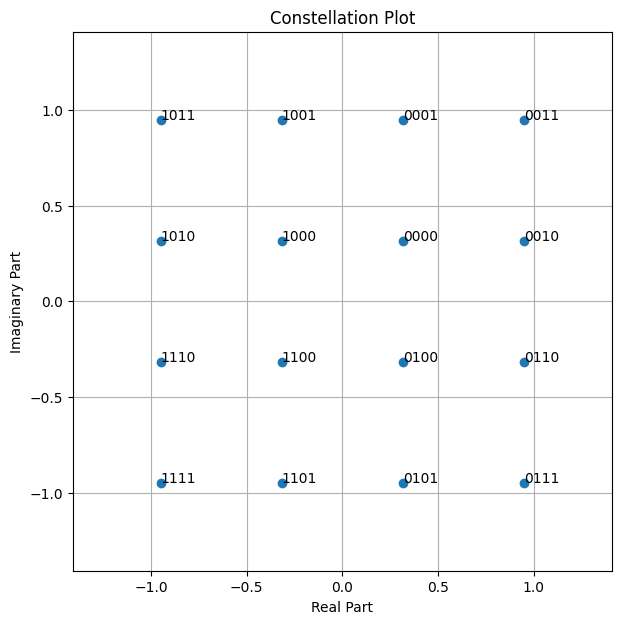

In [20]:
constellation = sionna.mapping.Constellation("qam", num_bits_per_symbol)
fig = constellation.show()

Mapper that maps each row of b to the constellation symbols according to the bit labeling in the constellation plot above

In [21]:
mapper = sionna.mapping.Mapper(constellation=constellation)
x = mapper(b)
x[:10]

<tf.Tensor: shape=(10, 1), dtype=complex64, numpy=
array([[ 0.3162278-0.9486833j],
       [-0.9486833+0.3162278j],
       [ 0.9486833+0.3162278j],
       [-0.9486833-0.3162278j],
       [-0.9486833-0.3162278j],
       [ 0.9486833+0.3162278j],
       [-0.9486833+0.3162278j],
       [-0.9486833+0.3162278j],
       [ 0.3162278-0.9486833j],
       [-0.9486833+0.3162278j]], dtype=complex64)>

Sending the symbols through an AWGN channel

Text(0.5, 1.0, 'Received symbols')

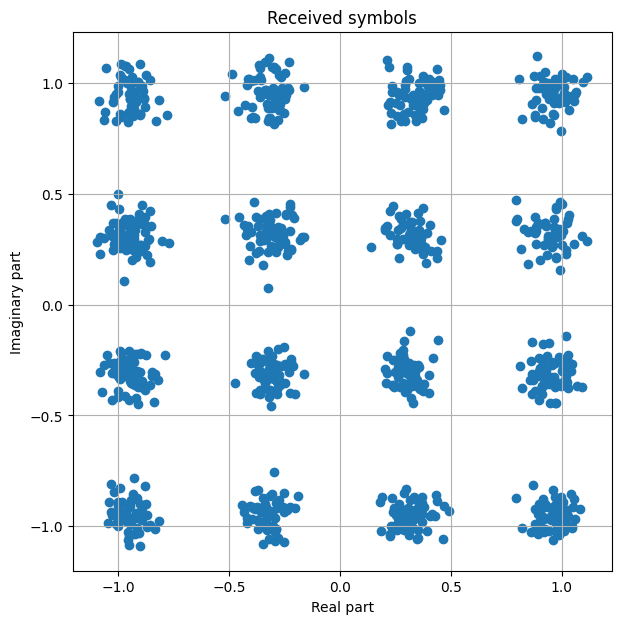

In [23]:
awgn = sionna.channel.AWGN()
ebno_db = 15 # dB
no = sionna.utils.ebnodb2no(ebno_db, num_bits_per_symbol, coderate=1)
y = awgn([x, no])

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
plt.scatter(np.real(y), np.imag(y))
ax.set_aspect('equal', adjustable='box')
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.grid(True, which='both', axis='both')
plt.title('Received symbols')